In [1]:
!pip -q install kiwipiepy pandas matplotlib

import os
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from kiwipiepy import Kiwi


In [2]:
file_path = r"C:\Users\TEST OS\03.비정형\1893700\text\paragraphs.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

print(text[:500])


[1]
본격적인 연말연시를 앞둔 지금, 연이은 모임과 파티가 코앞으로 다가왔죠. 소중한 사람들과 보내는 행복한 순간을 더 특별하게 만들어주는 건 역시 내 맘에 쏙 드는 스타일링이 아닐까요? 이번 시즌 가장 핫한 홀리데이 룩 트렌드를 모았습니다. 또한 현실적이고 웨어러블하게 풀어내는 방법까지 준비했으니, 끝까지 놓치지 마세요.

[2]
은은한 광채로 절제된 화려함을

[3]
가장 눈에 띄는 트렌드는 바로 화려하고 반짝이는 소재입니다. 여기서 놓쳐선 안 될 포인트는 바로 정제된 디자인을 선택하는 것! 반짝이는 소재는 과하면 자칫 촌스럽거나 부해 보이기 십상이기에 똑똑한 균형을 유지하는 게 무엇보다 중요하죠. 켄달 제너는 은은한 반짝임이 돋보이는 유리섬유 소재의 프린지 드레스를 선보였습니다. 클래식한 화이트 컬러는 실험적인 소재감은 중화시키되 아름다운 반짝임은 더 돋보이게 하죠. 또한 과감한 슬릿 디테일과 날렵한 실루엣의 포인트 토 힐을 매치한 점 역시 반짝이는 소재를 스타일링할 때 중요


In [3]:
text = text.lower()

text = re.sub(r"[^가-힣a-z\s]", " ", text)

text = re.sub(r"\s+", " ", text).strip()

print(text[:300])


본격적인 연말연시를 앞둔 지금 연이은 모임과 파티가 코앞으로 다가왔죠 소중한 사람들과 보내는 행복한 순간을 더 특별하게 만들어주는 건 역시 내 맘에 쏙 드는 스타일링이 아닐까요 이번 시즌 가장 핫한 홀리데이 룩 트렌드를 모았습니다 또한 현실적이고 웨어러블하게 풀어내는 방법까지 준비했으니 끝까지 놓치지 마세요 은은한 광채로 절제된 화려함을 가장 눈에 띄는 트렌드는 바로 화려하고 반짝이는 소재입니다 여기서 놓쳐선 안 될 포인트는 바로 정제된 디자인을 선택하는 것 반짝이는 소재는 과하면 자칫 촌스럽거나 부해 보이기 십상이기에 똑똑한 균형


In [4]:
kiwi = Kiwi()

nouns = [
    tok.form
    for tok in kiwi.tokenize(text)
    if tok.tag in ("NNG", "NNP")
]

print(nouns[:30], " ...")
print("명사 토큰 개수:", len(nouns))


['본격', '연말', '연시', '모임', '파티', '코앞', '사람', '행복', '순간', '특별', '맘', '스타일링', '이번', '시즌', '홀리데이', '룩', '트렌드', '현실', '웨어러블', '방법', '준비', '끝', '광채', '절제', '눈', '트렌드', '소재', '포인트', '정제', '디자인']  ...
명사 토큰 개수: 223


In [5]:
stopwords = set([
    "그리고","하지만","또","더","및","등","수","것","거","때","곳","이번","지난","올해","내년","최근","당시",
    "관련","대해","통해","위해","따라","이날","현재","이후","이전","모두","각각","일부","다수",
    "경우","상황","사실","문제","결과","기자","보도","발표","설명",

 
    "the","and","to","of","is","in","a","an","or","but","if","are","was","were","be","been","being",
    "for","with","on","at","by","from","as","so","than","too","very"
])

filtered_words = [w for w in nouns if w not in stopwords and len(w) > 1]

top20 = Counter(filtered_words).most_common(20)
top20


[('소재', 10),
 ('선택', 7),
 ('스타일', 6),
 ('디자인', 5),
 ('세련', 5),
 ('드레스', 4),
 ('디테일', 4),
 ('매치', 4),
 ('레이스', 4),
 ('트렌드', 3),
 ('절제', 3),
 ('포인트', 3),
 ('컬러', 3),
 ('장식', 3),
 ('파티', 2),
 ('특별', 2),
 ('스타일링', 2),
 ('시즌', 2),
 ('홀리데이', 2),
 ('현실', 2)]

In [6]:
df = pd.DataFrame(Counter(filtered_words).items(), columns=["keyword", "frequency"])
df = df.sort_values(by="frequency", ascending=False).reset_index(drop=True)

df.to_csv("keyword_frequency.csv", index=False, encoding="utf-8-sig")

df.head(20)


,keyword,frequency
0,소재,10
1,선택,7
2,스타일,6
3,세련,5
4,디자인,5
5,매치,4
6,디테일,4
7,드레스,4
8,레이스,4
9,절제,3


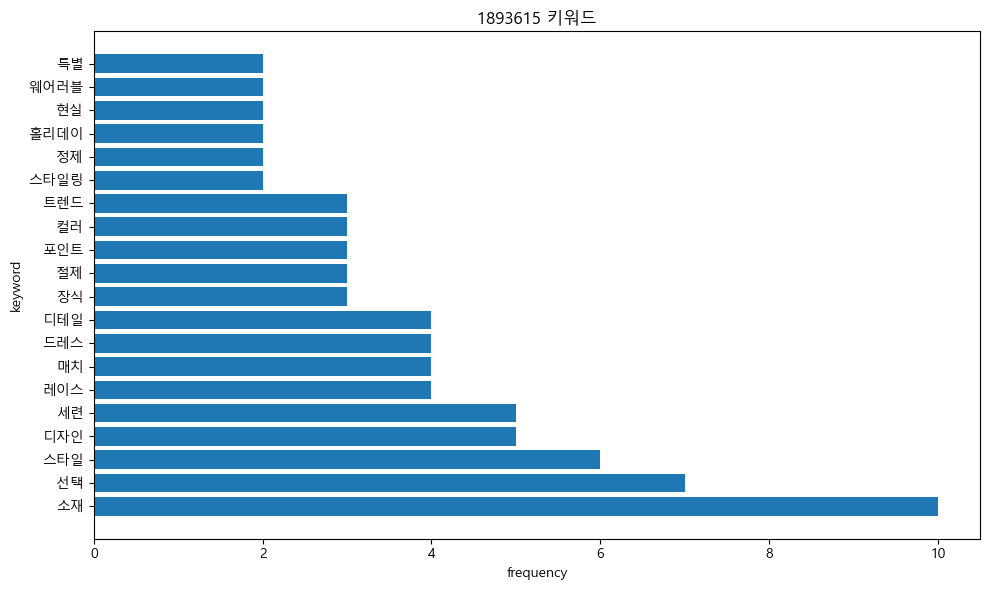

In [7]:
font_candidates = ["Malgun Gothic", "맑은 고딕", "Gulim", "굴림"]
available_fonts = {f.name for f in font_manager.fontManager.ttflist}

chosen = None
for fc in font_candidates:
    if fc in available_fonts:
        chosen = fc
        break

if chosen is not None:
    rc("font", family=chosen)
plt.rcParams["axes.unicode_minus"] = False

top20_df = df.head(20).copy()
top20_df = top20_df.sort_values("frequency", ascending=True)  # 가로막대 보기 좋게

plt.figure(figsize=(10, 6))

plt.barh(top20_df["keyword"], top20_df["frequency"])
plt.gca().invert_yaxis()

plt.title("1893700 키워드")
plt.xlabel("frequency")
plt.ylabel("keyword")

plt.tight_layout()
plt.show()
